# Problem Session 9
## Classifying Pumpkin Seeds II

In this notebook you continue to work with the pumpkin seed data from <a href="https://link.springer.com/article/10.1007/s10722-021-01226-0">The use of machine learning methods in classification of pumpkin seeds (Cucurbita pepo L.)</a> by Koklu, Sarigil and Ozbek (2021).

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

#### 1. Load then prepare the data


- Load the data stored in `Pumpkin_Seeds_Dataset.xlsx` in the `Data` folder,
- Create a column `y` where `y=1` if `Class=Ürgüp Sivrisi` and `y=0` if `Class=Çerçevelik` and
- Make a train test split setting $10\%$ of the data aside as a test set.

In [ ]:
seeds = pd.read_excel("../../Data/Pumpkin_Seeds_Dataset.xlsx")

## Create the y column here


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
## Make the train test split here



#### 2. Refresh your memory

If you need to refresh your memory on these data and the problem, you may want to look at a small subset of the data, look back on `Problem Session 8` and/or browse Figure 5 and Table 1 of this paper, <a href="pumpkin_seed_paper.pdf">pumpkin_seed_paper.pdf</a>

In [ ]:
## code here



#### 3. Principal components analysis (PCA)

One way you may use PCA is as a data preprocessing step for supervised learning tasks. In this problem you will try it as a preprocessing step for the pumpkin seed data and see if this preprocessing step helps your model outperform the models from `Problem Session 8`.

##### a. 

Run the training data through PCA with two components and then plot the resulting principal values. Color each point by its class.

<i>Hint: Remember to scale the data before running it through PCA</i>.

In [ ]:
## Import what you need for PCA
from sklearn.decomposition import
from sklearn.preprocessing import
from sklearn.pipeline import

In [ ]:
## Make the PCA Pipeline here


## Fit the PCA here


## Get the transformed training data here
## Store it in the variable fit provided below
fit = 

In [ ]:
## This code will help you plot the two classes
plt.figure(figsize=(7,5))

## Plot y=0 class here
plt.scatter(fit[, 0], 
            fit[, 1],
            color = 'b',
            label=,
            alpha=.6)

## Plot the y=1 class here
plt.scatter(fit[, 0], 
            fit[, 1],
            color='r',
            marker='x',
            label=,
            alpha=.6)

plt.legend(fontsize=10)

plt.xlabel("First PCA Value", fontsize=12)
plt.ylabel("Second PCA Value", fontsize=12)

plt.show()

##### b.

How does the PCA with only two componenets appear to separate the data?

##### Write here


##### c.

Run 5-fold cross-validation below to find the optimal value of $k$ for a $k$ nearest neighbors model fit on the first and second PCA values. What is the optimal $k$ and the associated average cross-validation accuracy? How does this compare to the accuracies from `Problem Session 8`?

In [ ]:
## Import what you need here
from sklearn.neighbors import
from sklearn.model_selection import
from sklearn.metrics import

In [ ]:
## Make the kfold object here



In [ ]:
## Fill in the missing code below to run the cross validation
ks = range(1, 51)

## Make an array to hold the accuracies
pca_2_accs = np.zeros()

i = 0
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    ## This will help you keep track of the loop progress
    print("CV Split", i)
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    
    ## Note, putting the PCA here speeds up the loop
    ## Make the PCA pipeline
    pca_pipe = 
    
    ## Fit and then get the PCA transformed tt data here
    pca_tt = 
    
    ## Get the transformed holdout data here
    pca_ho = pca_pipe.transform(seeds_ho[features].values)
    
    j = 0
    for k in ks:
        ## Define the KNN model here
        knn = 
        
        ## Fit the knn model
        knn
        
        ## Get the prediction on the holdout data
        pred = 
        
        ## Records the accuracy
        pca_2_accs[i,j] = accuracy_score(seeds_ho.y.values, pred)
        
        j = j + 1
    i = i + 1

In [ ]:
## Will plot the avg cv accuracy as a function of k
plt.figure(figsize=(7,5))


plt.plot(ks, 
         np.mean(pca_2_accs, axis=0),
         '-o')


plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("$k$", fontsize=12)
plt.ylabel("Avg. CV Accuracy", fontsize=12)

plt.show()

##### d.

We can think of the number of components used in PCA as another hyperparameter we can tune.

Fill in the missing code below to find the optimal number of components and $k$ pairing for this problem. What is the best average cross-validation accuracy?

In [ ]:
ks = range(1, 51)
comps = range(2,6)

## Makes a 3-D array of to record the accuracies in
pca_accs = np.zeros((n_splits, len(comps), len(ks)))

i = 0
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    ## Keeps track of the cross validation split you are on
    ## This loop can be a little long
    print("CV Split", i)
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    j = 0
    for n_comps in comps:
        ## Make the PCA pipeline here
        pca_pipe = 
    
        ## Fit the PCA pipeline and get the transformed tt data
        pca_tt = 
        
        ## Get the transformed holdout data here
        pca_ho = 
        
        k = 0
        for neighbors in ks:
            knn = KNeighborsClassifier(neighbors)
            
            ## Fit on the tt data
            knn.fit()

            ## Get the holdout prediction
            pred = knn.predict()

            pca_accs[i,j,k] = accuracy_score(seeds_ho.y.values, pred)
            
            k = k + 1
        j = j + 1
    i = i + 1

In [ ]:
## This code will print out the best # components - k combo for you
## It also prints out the highest AVG CV Accuracy
max_index = np.unravel_index(np.argmax(np.mean(pca_accs, axis=0), axis=None), 
                                       np.mean(pca_accs, axis=0).shape)


print("The pair with the highest AVG CV Accuracy was",
         "k =", ks[max_index[1]],
         "and number of components =", np.round(comps[max_index[0]],2))
print("The highest AVG CV Accuracy was", np.max(np.mean(pca_accs, axis=0)))

#### 4. Trying Bayes based classifiers

Build LDA, QDA and naive Bayes' models on these data by filling in the missing code for the cross-validation below. 

Do these outperform your PCA-$k$NN model from above?

In [ ]:
## Import what you need
from sklearn.naive_bayes import 
from sklearn.discriminant_analysis import 

In [ ]:
## Make a holder for the accuracies
bayes_accs = np.zeros()


i = 0
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    ## Linear Discriminant Analysis
    lda = 
    
    lda.fit()
    lda_pred = lda.predict()
    
    ## Records the accuracies
    bayes_accs[i, 0] = accuracy_score(seeds_ho.y.values,
                                         lda_pred)
    
    ## Quadratic Discriminant Analysis
    qda = 
    
    qda.fit()
    
    qda_pred = qda.predict()
    
    ## Records the accuracies
    bayes_accs[i, 1] = accuracy_score(seeds_ho.y.values,
                                         qda_pred)
    
    
    ## Gaussian Naive Bayes
    nb = 
    
    nb.fit()
    nb_pred = nb.predict()
    
    ## Records the accuracies
    bayes_accs[i, 2] = accuracy_score(seeds_ho.y.values,
                                         nb_pred)
    
    i = i + 1

In [ ]:
## Print the Average CV Accuracies here


#### 5. A support vector machine classifier

In this problem you will work to build a support vector classifier on these data.

##### a.

Start by importing the support vector classifier from `sklearn`. Note that these data are not close to being linearly separable so we will not want `LinearSVC`.

In [ ]:
## code here

##### b.

You will now perform hyperparameter tuning on the `C` parameter of the support vector classifier. Fill in the missing pieces of the code below to perform 5-fold cross-validation for different values of `C`.

In [ ]:
## import kfold
from sklearn.model_selection import StratifiedKFold

## import Pipeline and StandardScaler

## import accuracy_score
from sklearn.metrics import accuracy_score

In [ ]:
## this will isolate the feature columns
features = seeds_train.columns[:-2]

In [ ]:
## set the number of CV folds
n_splits = 5

## Make the kfold object
kfold = StratifiedKFold(n_splits, 
                        random_state=2013, 
                        shuffle=True)


## the values of C you will try
Cs = [.01, .1, 1, 10, 25, 50, 75, 100, 125, 150]

## this will hold the CV accuracies
C_accs1 = 


## the cross-validation
i = 0
for train_index, test_index in kfold.split(seeds_train, seeds_train.y):
    seeds_tt = seeds_train.iloc[train_index]
    seeds_ho = seeds_train.iloc[test_index]
    
    j = 0
    for C in Cs:
        ## Make the pipeline
        pipe = 
    
        ## Fit the pipeline
        
    
        ## Predict on the holdout set
        pred = 

        ## record the accuracies
        C_accs1[i, j] = 
        
        j = j + 1
    i = i + 1

##### c.

Plot the average cross-validation accuracy against the $\log$ of `C`.

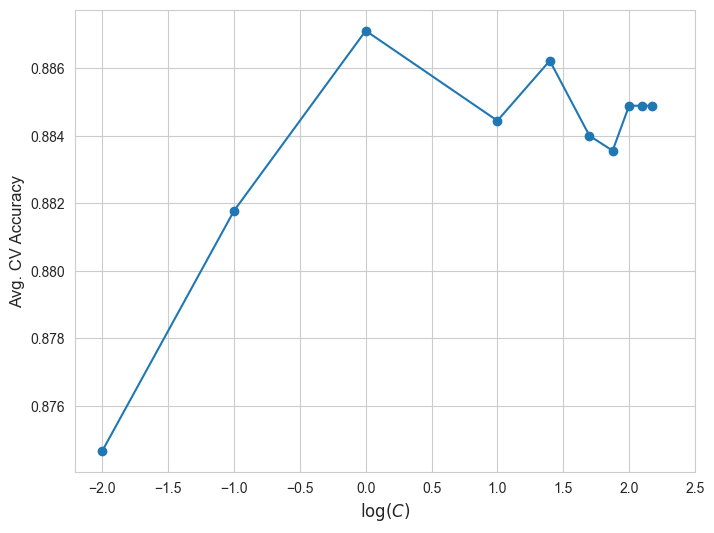

In [ ]:
plt.figure(figsize = (8,6))

## Fill in the missing code
plt.plot(,
         , 
         '-o')

plt.xlabel("$\log(C)$", fontsize=12)
plt.ylabel("Avg. CV Accuracy", fontsize=12)
plt.xticks(np.arange(-2,3,.5),fontsize=10)
plt.yticks(fontsize=10)

plt.show()

##### d.

What was the optimal value of `C` and what was the average cross-validation accuracy for this value of `C`?

In [ ]:
optimal_C = 
optimal_accuracy = 

print("The optimal C was ", optimal_C, " which gave a mean CV accuracy of ", optimal_accuracy)

#### 6. (OPTIONAL) LDA for supervised dimensionality reduction

Only do this section if you have time.

While we introduced linear discriminant analysis (LDA) as a classification algorithm, it was originally proposed by Fisher as a supervised dimension reduction technique, <a href="https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15227/1/138.pdf">https://digital.library.adelaide.edu.au/dspace/bitstream/2440/15227/1/138.pdf</a>. In particular, the initial goal was to project the features, $X$, corresponding to a binary output, $y$, onto a single dimension which best separates the possible classes. This single dimension has come to been known as <i>Fisher's discriminant</i>.

Walk through the code below to perform this supervised dimension reduction technique on these data

##### a.

First make a validation set from the training set for demonstration purposes.

In [ ]:
## First we make a validation set for demonstration purposes
seed_tt, seeds_val = 


##### b.

Now make a pipeline that first scales the data and ends with linear discriminant analysis. Then fit the pipeline.

In [ ]:
pipe = 

In [ ]:
## Fit the pipeline here


##### c. 

Now calculate the Fisher discriminant by using `transform` with the pipeline you fit in <i>b.</i>

In [ ]:
## code here


##### d. 

To visualize how LDA separated the two classes while projecting the 12 dimensional data onto a one dimensional subspace you can plot a histogram of the Fisher discriminant colored by the pumpkin seed class of the observation.

In [ ]:
plt.figure(figsize=(10,5))

## Fill in the code below
## Plot the fisher's discriminant for y=0
plt.hist(, 
         color='blue',
         edgecolor="black",
         label="$y=0$")

## Plot the fisher's discriminant for y=1
plt.hist(, 
         color='orange', 
         hatch='/', 
         alpha=.6,
         edgecolor="black",
         label="$y=1$")

plt.xlabel("Fisher Discriminant", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(fontsize=10)

plt.show()

##### e.

While there is some separation between the two classes, it is not perfect, this should be expected based on the exploratory data analysis you did in `Problem Session 8`.

We could use this discriminant in order to make classifications, for example by setting a simple cutoff value or as input into a different classification algorithm.

However, it is important to note that the LDA algorithm maximizes the separation of the two classes among observations of the training set. It is possible that separation would not be as good for data the algorithm was not trained on.

In this example we can visually inspect by plotting a histogram of the Fisher discriminant values for the validation set we created. Does the separation seem as pronounced on the validation data?

In [ ]:
## Get the discriminant for the validation set


In [ ]:
plt.figure(figsize=(10,5))

## Fill in the missing code below

## Plot the validation discriminant for the y=0 observations
plt.hist(, 
         color='blue',
         edgecolor="black",
         label="$y=0$")

## Plot the validation discriminant for the y=1 observations
plt.hist(, 
         color='orange', 
         hatch='/', 
         alpha=.6,
         edgecolor="black",
         label="$y=1$")

plt.xlabel("Fisher Discriminant", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.legend(fontsize=10)

plt.show()

##### Write any notes you would like here



--------------------------

This notebook was written for the Erd&#337;s Institute C&#337;de Data Science Boot Camp by Matthew Osborne, Ph. D., 2023.

Any potential redistributors must seek and receive permission from Matthew Tyler Osborne, Ph.D. prior to redistribution. Redistribution of the material contained in this repository is conditional on acknowledgement of Matthew Tyler Osborne, Ph.D.'s original authorship and sponsorship of the Erdős Institute as subject to the license (see License.md)